In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing Data with Features 
data_hedonic = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [12]:
data_perfume = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Hedonic_Perfume.csv')

data_razor = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/UtiliRazor.csv')

In [13]:
data_razor = data_razor [data_razor['helpful_vote'] != 0]

## 1. Functions for helpfulness analysis 

In [3]:
# Function Building for analyzing the helpful votes by product type

def plot_votes_by_product_type(data):
    # Get unique product types
    product_types = data['product'].unique()

    # Initialize lists to store counts
    not_helpful_votes_counts = []
    helpful_votes_counts = []

    # Calculate counts for each product type
    for product_type in product_types:
        # Count of rows where helpful votes are zero for the current product type
        not_helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)

        # Count of rows where helpful votes are greater than zero for the current product type
        helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)

    # Create stacked bar chart
    plt.figure(figsize=(12, 6))

    # Plotting the stacked bar chart
    index = range(len(product_types))
    bar_width = 0.3

    plt.bar(index, not_helpful_votes_counts, bar_width, color='red', label='Not Helpful Votes')
    plt.bar([i + bar_width for i in index], helpful_votes_counts, bar_width, color='blue', label='Helpful Votes')

    # Adding counts on top of each bar for not helpful votes
    for i, count in enumerate(not_helpful_votes_counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom', color='black')

    # Adding counts on top of each bar for helpful votes
    for i, count in enumerate(helpful_votes_counts):
        plt.text(i + bar_width, count + 0.1, str(count), ha='center', va='bottom', color='black')

    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.title('Not Helpful Votes vs Helpful Votes by Product Type')
    plt.xticks([i + bar_width/4 for i in index], product_types)
    plt.legend()

    # Display the plot
    plt.show()

In [18]:
#Function for calculating the review counts by product type/helpful votes 
def calculate_review_counts(data, category_column='product'):
    # Get unique categories
    categories = data[category_column].unique()

    # Initialize lists to store counts and categories
    categories_list = []
    not_helpful_votes_counts = []
    helpful_votes_counts = []
    total_reviews_counts = []

    # Calculate counts for each category
    for category in categories:
        # Check if the category exists in the DataFrame
        if category not in data[category_column].values:
            print(f"Category '{category}' not found in the DataFrame.")
            continue
        
        # Count of rows where helpful votes are zero for the current category
        not_helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)
        
        # Count of rows where helpful votes are greater than zero for the current category
        helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)
        
        # Append category to the list for DataFrame creation
        categories_list.append(category)

        # Total number of reviews for the current category
        total_reviews_count = not_helpful_votes_count + helpful_votes_count
        total_reviews_counts.append(total_reviews_count)

    # Calculate percentage of helpful votes
    total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
    helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

    # Create DataFrame to store counts with categories
    counts_df = pd.DataFrame({
        category_column.capitalize(): categories_list,
        'Not Helpful Votes': not_helpful_votes_counts,
        'Helpful Votes': helpful_votes_counts,
        'Total Reviews': total_reviews_counts,
        'Helpful Votes Percentage': helpful_vote_percentages
    })

    # Display the DataFrame
    return(counts_df)




## 2. Helpfulness Analysis

In [22]:
# Helpfulness Analysis for Hedonic Data after product 
review_counts_hed_prod = calculate_review_counts (data_hedonic, 'product')
print(review_counts_hed_prod)

#Saving to CSV
#review_counts_hed_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Prod.csv', index=False)

        Product  Not Helpful Votes  Helpful Votes  Total Reviews  \
0   Video Games               1988            451           2439   
1  Facial Spray               4978           1391           6369   
2     Chocolate               2957            515           3472   
3         Music               1370            412           1782   
4       Perfume               7185            964           8149   

   Helpful Votes Percentage  
0                 18.491185  
1                 21.840163  
2                 14.832949  
3                 23.120090  
4                 11.829672  


In [28]:
# Helpfulness Analysis for Hedonic Data after Main Category
review_counts_hed_cat = calculate_review_counts (data_hedonic, 'main_category')

#Print the results
print(review_counts_hed_cat)

#Saving to CSV
#review_counts_hed_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Cat.csv', index=False)

  Main_category  Not Helpful Votes  Helpful Votes  Total Reviews  \
0   Video Games               1988            451           2439   
1        Beauty              12163           2355          14518   
2       Grocery               2957            515           3472   
3         Music               1370            412           1782   

   Helpful Votes Percentage  
0                 18.491185  
1                 16.221243  
2                 14.832949  
3                 23.120090  


In [24]:
# Helpfulness Analysis for Utilitarian Data after Product Category
review_counts_uti_prod = calculate_review_counts (data_utilitarian, 'product')
print (review_counts_uti_prod)

#Saving to CSV
#review_counts_uti_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Prod.csv', index=False)

        Product  Not Helpful Votes  Helpful Votes  Total Reviews  \
0  Toilet Paper               1113            701           1814   
1       Battery               6234           1026           7260   
2        Filter               4513            694           5207   
3  Gaming Mouse               3503            517           4020   
4    Hair Brush               3245            545           3790   

   Helpful Votes Percentage  
0                 38.643881  
1                 14.132231  
2                 13.328212  
3                 12.860697  
4                 14.379947  


In [30]:
# Helpfulness Analysis for Utilitarian Data after Main Category
review_counts_uti_cat = calculate_review_counts (data_utilitarian, 'main_category')

# print 
print (review_counts_uti_cat)

#  Saving to csv
#review_counts_uti_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Cat.csv')

   Main_category  Not Helpful Votes  Helpful Votes  Total Reviews  \
0      Household               1113            701           1814   
1    Electronics               9737           1543          11280   
2     Appliances               4513            694           5207   
3  Personal Care               3245            545           3790   

   Helpful Votes Percentage  
0                 38.643881  
1                 13.679078  
2                 13.328212  
3                 14.379947  


## Analyzing helpfulness votes

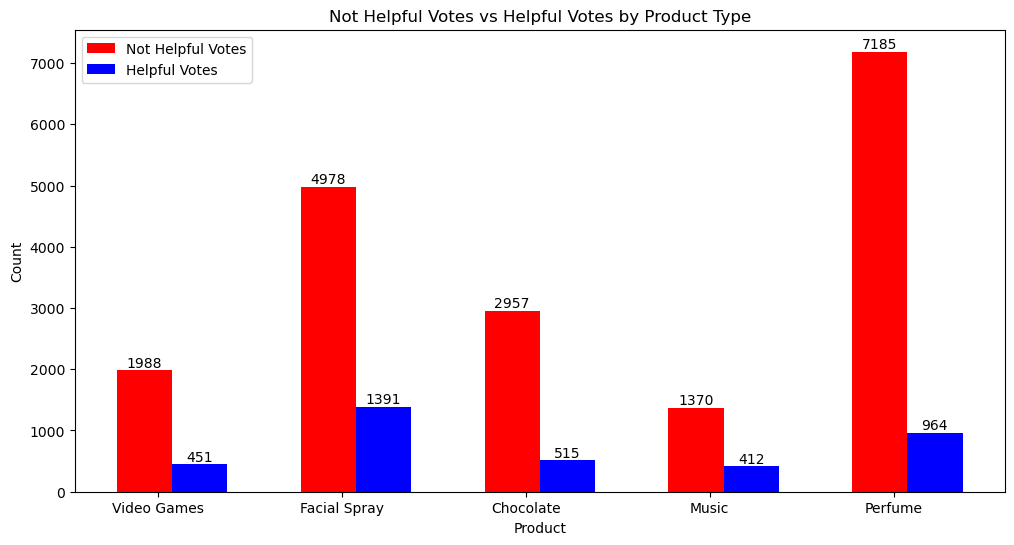

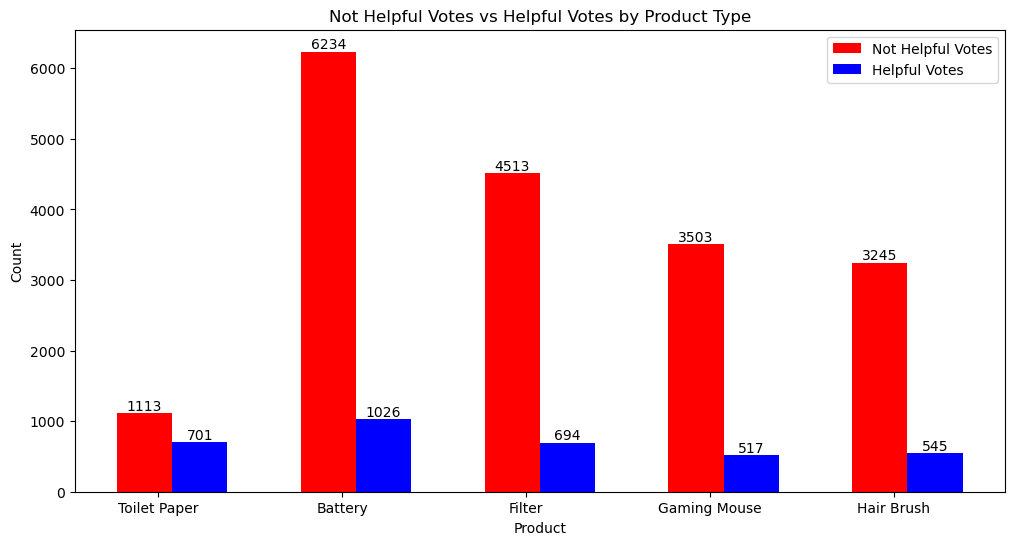

In [9]:
plot_votes_by_product_type (data_hedonic)
plot_votes_by_product_type (data_utilitarian)